In [1]:
import os
import yaml
from glob import glob

import matplotlib.pyplot as plt
import numpy as np

from mejiro.utils import util

# read configuration file
with open('roman_hlwas_wide.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

In [2]:
if config['dev']:
    config['pipeline_dir'] += '_dev'

In [3]:
data_dir = os.path.join(config['data_dir'], config['pipeline_dir'], '04')

pickles = sorted(glob(os.path.join(data_dir, 'sca*', 'SyntheticImage_*.pkl')))
print(f'Found {len(pickles)} pickle(s) in {data_dir}')

Found 1225 pickle(s) in /data/bwedig/mejiro/roman_hlwas_wide_dev/04


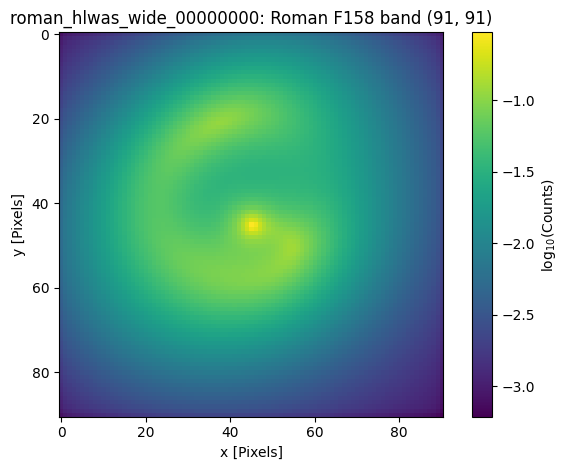

In [4]:
sample = util.unpickle(pickles[0])
sample.plot()

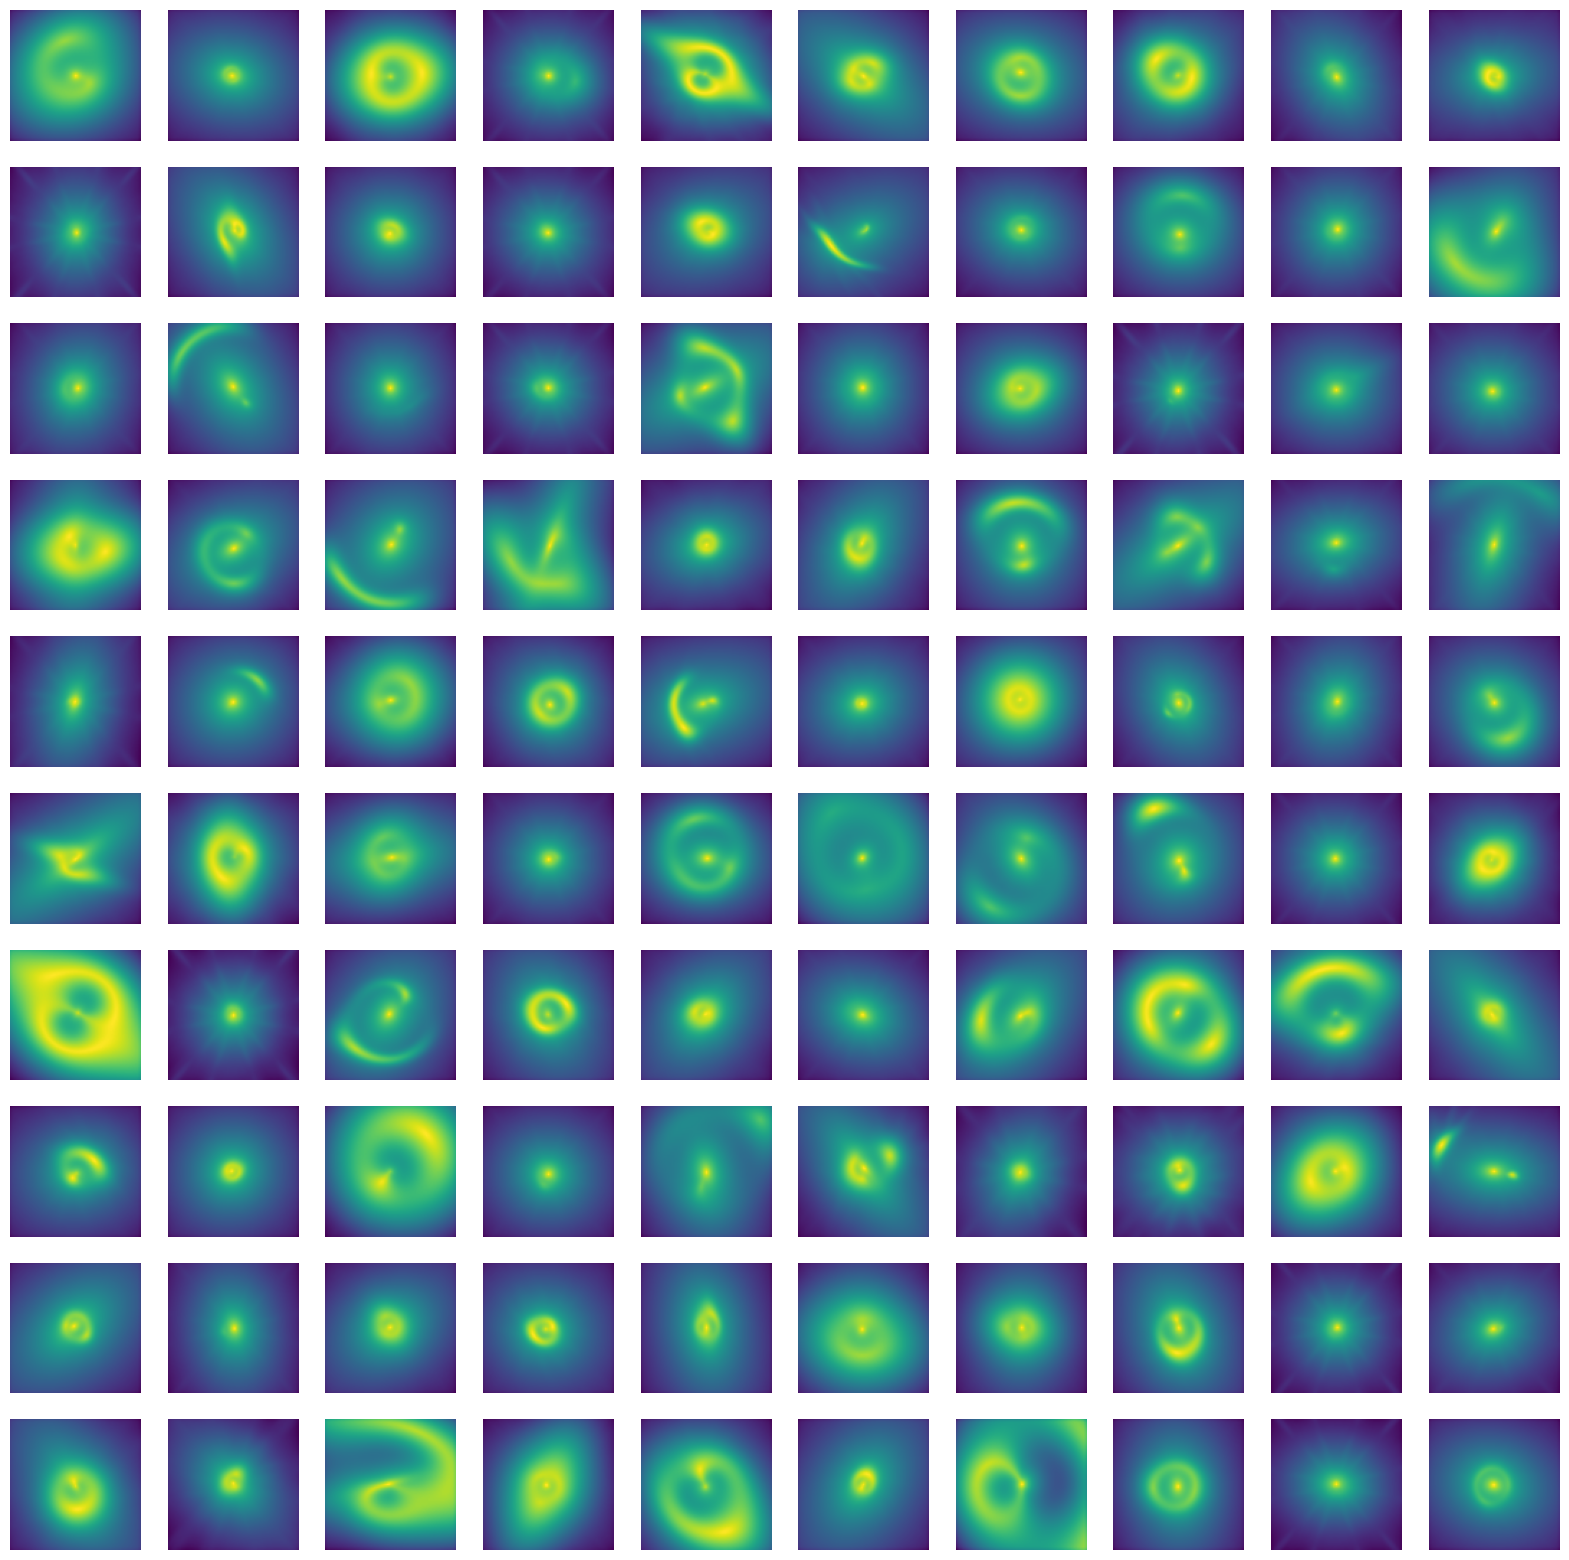

In [5]:
_, ax = plt.subplots(10, 10, figsize=(20, 20))

for i in range(100):
    sample = util.unpickle(pickles[i])
    ax.flat[i].imshow(np.log10(sample.image))
    ax.flat[i].axis('off')

plt.show()